<div style="text-align: center;">

# **Algoritmia Cuantica** 
# Transformada Cuantica de Fourier  directa e inversa  
<font size="2">

##### Daniel Amauri Vázquez Gutiérrez
</font>


**Realiza un circuito cuántico que realice la transformada de Fourier y comprobarlo con la transformada cuántica de fourier inversa** (crea el circuito de la tranformada cuántica de fourier inversa)

Para comenzar , llamamos las bibliotecas nesesarias de python

In [2]:
import numpy as np 
import math
from qiskit import QuantumCircuit, transpile, assemble 
from qiskit_aer import Aer #Aer es un modulo de Qiskit que proporciona simuladores cuanticos para ejecutarlos de manera local.  
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

import qiskit 
print(qiskit.version.get_version_info()) 

1.2.0


Pedimos el numero de de Qbits que se quieran utilizar   y posteriormente  pedimos un numero que sea capaz de ser representado   con ese numero de Qbits 

In [3]:
s=int(input("Ingresa un numero natural de qbits a utilizar: "))  

Empleamos la Transformada Cuantica de Fourier :  
$$QFT |x \rangle= \frac{1}{\sqrt{N}}\sum^{N-1}_{y=0}e^{\frac{2\pi ixy}{N}}|y\rangle $$

Entonces definiendo $N=2^n$, con $n$ el numero de qubits: 

$$QFT |x \rangle = \frac{1}{2^{\frac{n}{2}}}\sum^{2^n-1}_{y=0}e^{\frac{2\pi i xy}{2^n}}|y\rangle$$

donde $n$ es en numero de Qbits 

La primera parte de nuesto codigo  es para codificar el codigo binario en nuestros qbits utilizando la compuerta $X$ , y en paralelo guardaremos  una copia de este codigo  en un arreglo para compararlo al final del proceso cuando  hayamos creado nuestra $IQDT$. 

Posteriormente agregamos compuertas de Hadamard y de rotacion controlada; finalmente concluimos intercambiando de lugar  los Qbits creando un pequeño algoritmo para hacerlo ,esto debido a que en el proceso a nivel computacional y fisico , el orden de los Qbits termina invertido. 

Cabe aclarar que el numero binario codificado aqui estara  de menor digito (arriba) , a menor digito (abajo). Por ejemplo si $x=3$, como sabemos : 

$$3_{10}=011_2$$

Especificamente vamos a representar el Qbit como : 
$$|110 \rangle$$
y el arreglo en el diagrama como : 
\begin{bmatrix}
1 \\
1 \\
0
\end{bmatrix}

(Aclaro esta parte para mi en el futuro, por que me dio un quebradero de cabeza por una razon que especificare al final)

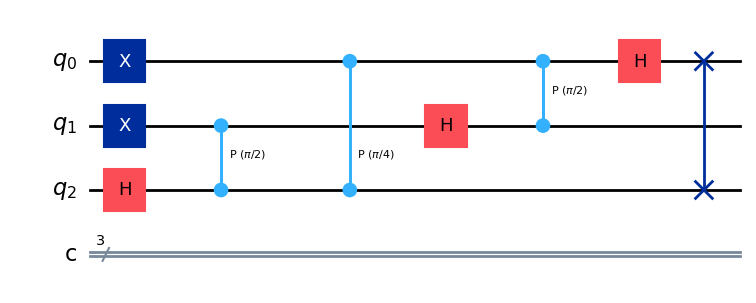

In [4]:
n=int(input(f"Ingresa un numero natural a ser transformado menor a {2**s}: "))

qc = QuantumCircuit(s,s)  

r=np.zeros(s)

#Apartir de nuestro numero , inicializamos nustros qbits con !
t=n
for i in range(s):    #por nomenglatura de Qskit , entramos el valor de nuestro numero binario alreves, comenzando vel valor mas pequeño . 
   if(t%2==1):  
      r[s-(i+1)]=1  #Usamos un arreglo que codifica nuestro numero en binario // Util despues 
      qc.x(i)
   t=t//2 


#Creamos el circuito de Transformada cuantica de fourier inversa  
#agragando compuertas de Hadamard y rotaciones 
   
for j in range(s):  
   qc.h(s-(j+1))
   if s-(j+1)>0:
      for k in range(s-(j+1)):
         l=s-(j+1)-1-k #un paso que nos ayuda a que se agregen las rotaciones adecuadamente 
         qc.cp(2*np.pi/(2**(s-j-l)),l,s-(j+1))
   

#Por la forma en que se maneja Qskit es nesesario hacer un swap de todos los qbits para obtner bien los resultados 
if s%2== 1:
   for l in range((s-1)//2):  # Querenmos que solo llegue a la mitad , de lo contrario acabaran igual que al principio
      qc.swap(l,s-1-l)
else:
   for l in range(s//2):  
      qc.swap(l,s-1-l)


 

qc.draw("mpl")

Ahora podemos visualizar el estado en el que la transofrmacion dejo a nuestros Qbits utilizando State Vector : 

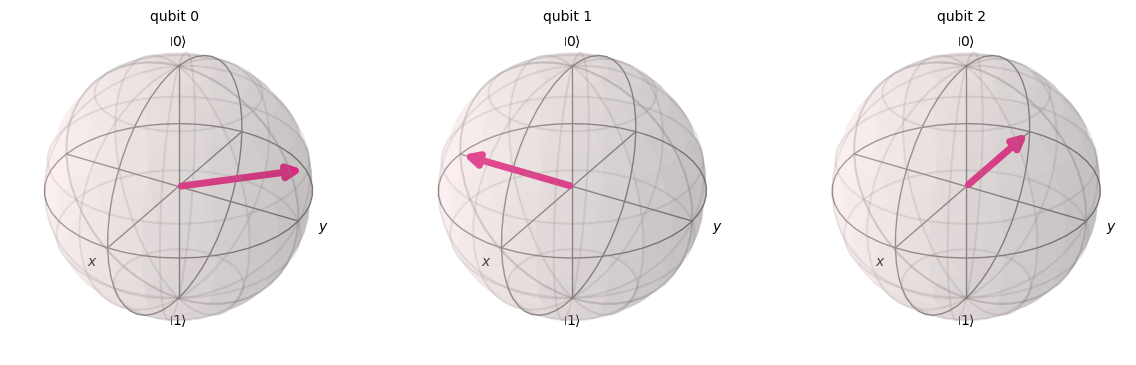

In [5]:
state=Statevector(qc)
plot_bloch_multivector(state)

Ahora , crearemos nuestra Transformada de Fourier Inversa ($IQFT$) , siguiendo la siguiente ecuacion: 

$$IQFT |y \rangle = \frac{1}{2^{\frac{n}{2}}}\sum^{2^n-1}_{x=0}e^{\frac{-2\pi i yx}{2^n}}|x\rangle$$

Aunque analizando mas profundamente  el por que funciona esto no es tan tribial como me parecio al inicio. El agregar  el signo menos $(-)$ en la exponencial inicialmente lo hice mas por las nesesidad de reveriilidad al hacer el circuito , sin embargo no tenia argumentos matematicos del por que hacerlo. 

Sin profundizar , tanto por que requeriria aun mas investigacion como por que no es tanto de nuestro interes el fundamentar el por que  es que esto pasa y funciona, argumento que se sabe que la $QFT$ es una transformacion unitaria , y por lo tanto: 

$$UU^{*}=U^{*}U=I$$ 

Por lo que en la $IQFT$ es natural que los elementos complejos que originalmente se encontraban en $QFT$ se vean ahora conjugados. 


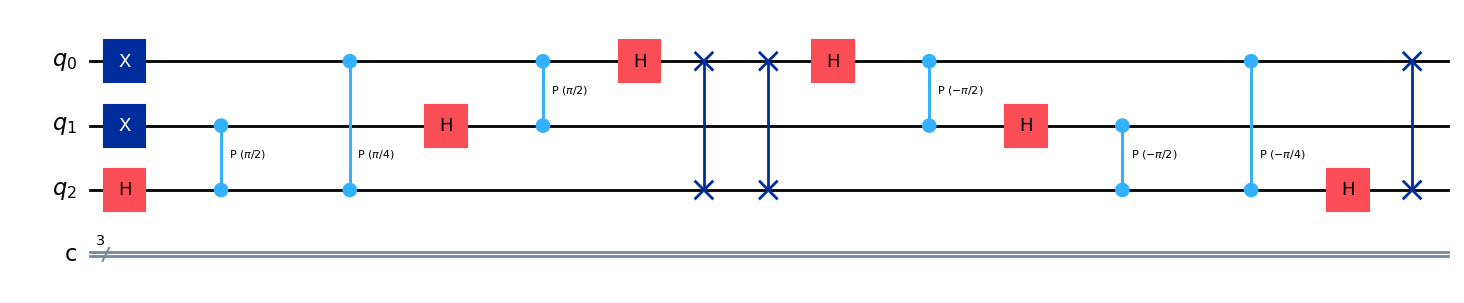

In [6]:

#Transformada Cuantica de Fourier Inversa  
 
#Primero volvemos a Switchear 

if s%2== 1:
   for l in range((s-1)//2):  # Querenmos que solo llegue a la mitad , de lo contrario acabaran igual que al principio
      qc.swap(l,s-1-l)
else:
   for l in range(s//2):  
      qc.swap(l,s-1-l)


#Volvemos a añadir las compuertas pero ahora en un sentido invertido 

for j in range(s):  
   qc.h(j)

   if j<(s-1):
      for k in range(j+1):
         qc.cp(2*np.pi/(-2**(k+2)),j+1,j-k)   


#Agragamos este SWAP que no deberia ser nesesario , sin embargo , lo ponemos dado que esto nos permite ver los estados de los Qbits en un orden
#usal en el que vemos los numeros binarios y asi poderlo comparar con el arreglo original que producimos al inicializar el circuito. 
if s%2== 1:
   for l in range((s-1)//2):  # Querenmos que solo llegue a la mitad , de lo contrario acabaran igual que al principio
      qc.swap(l,s-1-l)
else:
   for l in range(s//2):  
      qc.swap(l,s-1-l)


qc.draw("mpl")

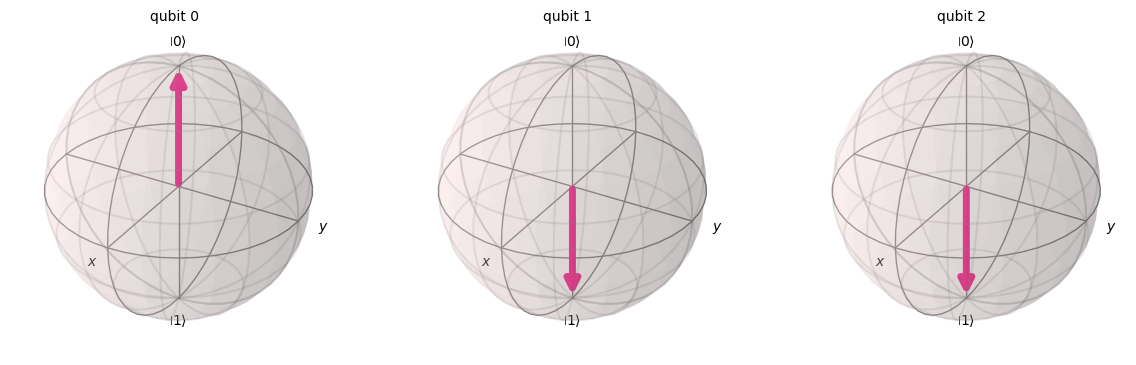

In [7]:
state=Statevector(qc)
plot_bloch_multivector(state)

El cual es igual que nuestro codigo binario original : 


In [8]:
print(r)

[0. 1. 1.]


Podemos entonces ver que la tranformada inversa funciona y regresa los vectores correctos. 

<font size="6">

**Preguntas y dudas(existenciales)**
</font>

Casi todas las dudas fueron leyendo recursos para hacer este  trabajo :)


1. Creacion de la compuerta Rotacion Controlada . 

    Hice demaciado desarrollo  para crear y ver como funcionaba una $QFT$ para 3 Qbits  a mano, entonces pase un ratillo de tiempo y en el libro *Quantum Computing Explain*  mencionan una forma para hacer esta compuerta : 

    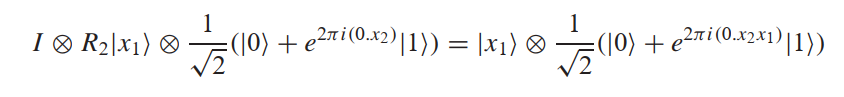

    especificamente en la pagina *212* . La hice matricialmente he hice muchisimos intentos para obtener el miembro derecho de la ecuacion anterior , sin embargo no lo logre 

Sin embargo , investigando , econtre que una forma de hacer esta compuerta de rotacion controlada es de la siguiente manera, almenos para 2 Qbits.  

$$CROT_\theta = |0\rangle \langle 0| \otimes I + |1\rangle \langle 1| \otimes R(\theta) 

De esta forma , empleando esa  compuerta pude conseguir el miembro izquierdo de la ecuacion original.


¿Hice algo incorrecto al implementar la forma del libro o el libro tiene un error? 

2. Duda sobre diapositivas de $QFT$  

Tengo entendido que en la diapositiva  21 del archivo *Entrelazamiento temporal y QFT*  se esta intentando representar el  3 binario , por que en la representacion transformada  , el Qbit 2 apunta a $|-\rangle$  , cosa que solo sucede  en los numeros impares , y el otro posible numero que podria representar es 6 y este  es par . 

Partiendo de eso , creo que esta mal la representacion  de ese Qbit transformado :
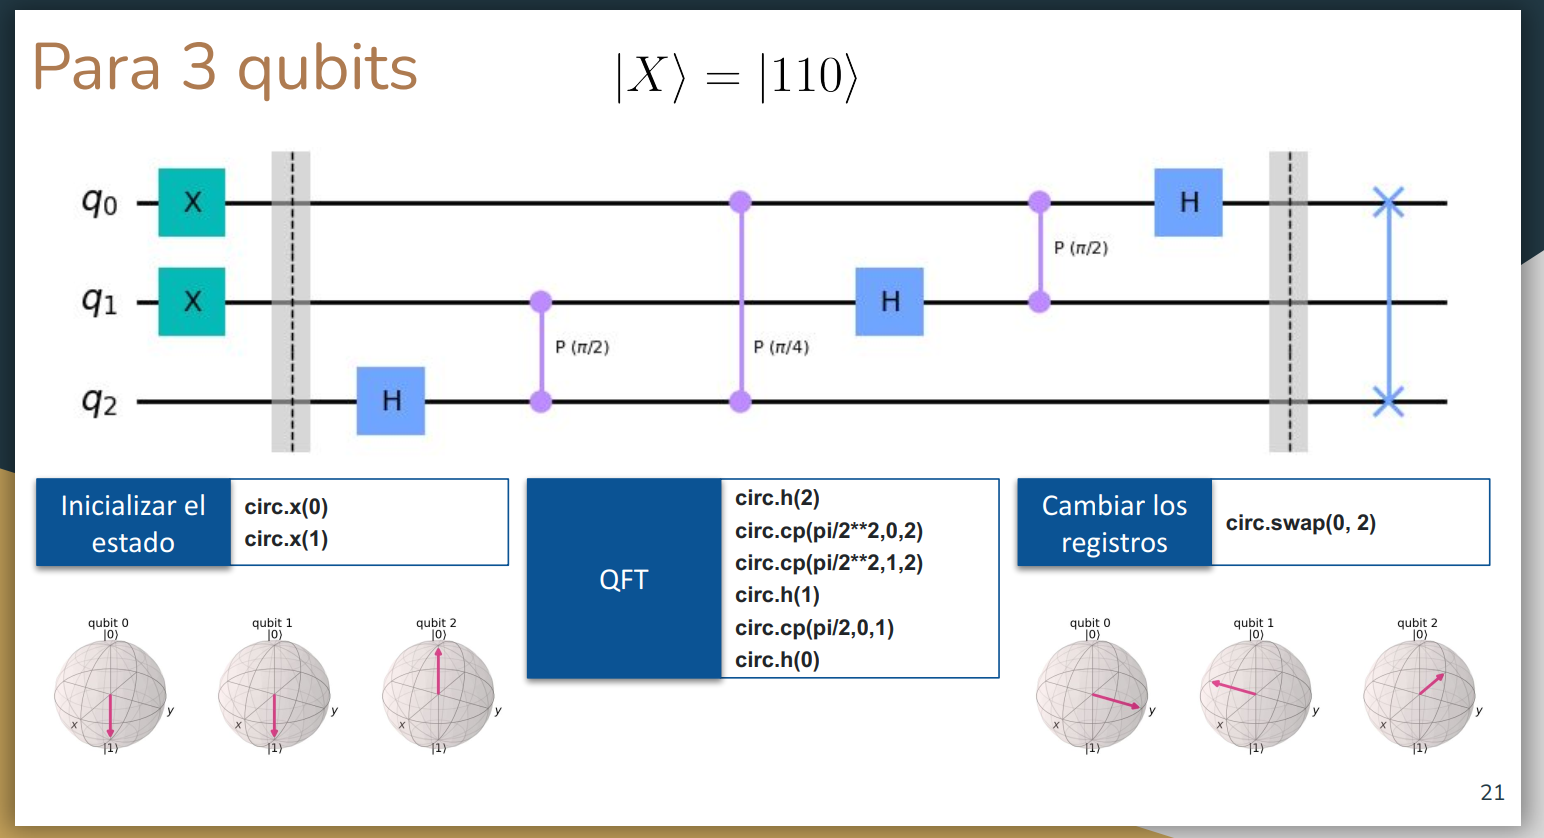 

por otro lado , obtuve para el 3  :  

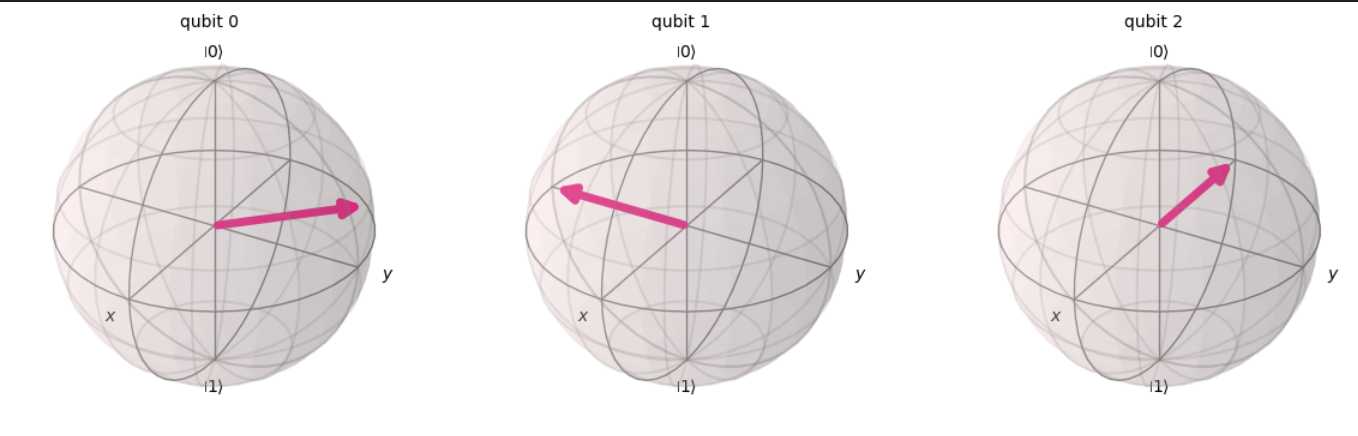 

y este al hacer las cuentas como lo hicimos en clase , concuerda con el numero 3 , pero no el representado en la diapositiva. 

Me gustaria saber si cometi una equivocacion o interprete mal las diapositivas :D 

Igualmente en la pagina 22 se explica como se aplica una transformada de fourier inversa , sin embargo no se añade el negativo en las compuertas de fase para regresar al estado original, pero por mas que lo intente de esa forma  no obtuve la inversa correcta hasta añadir el negativo.  


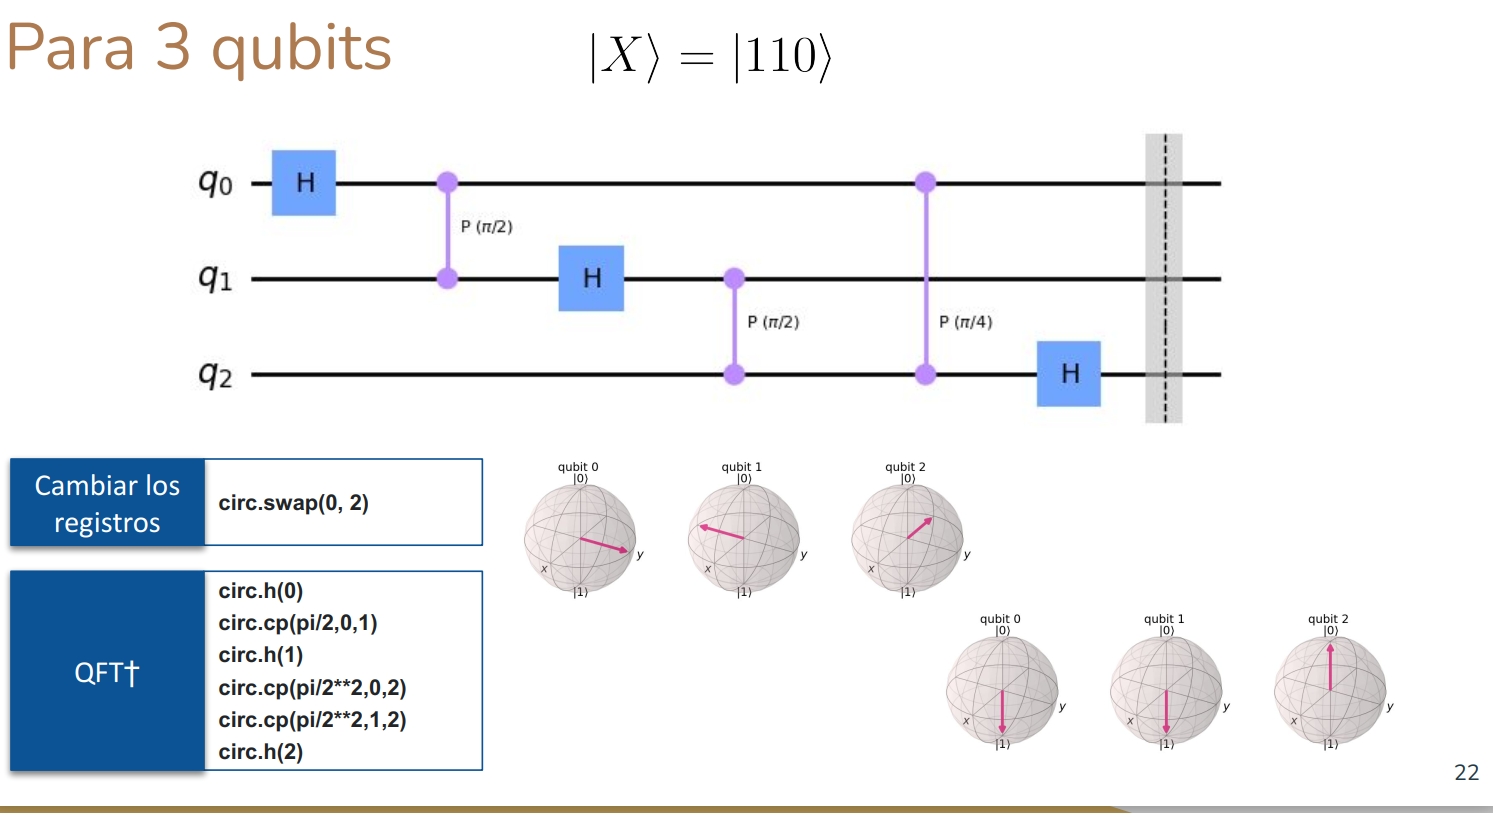 




Y eso es todo , je . En el caso de que sean errores de las diapositivas , igual si no tienen tiempo de corregirlas, si quieren puedo modificarlas , aprobechando que  soy de servicio social :D